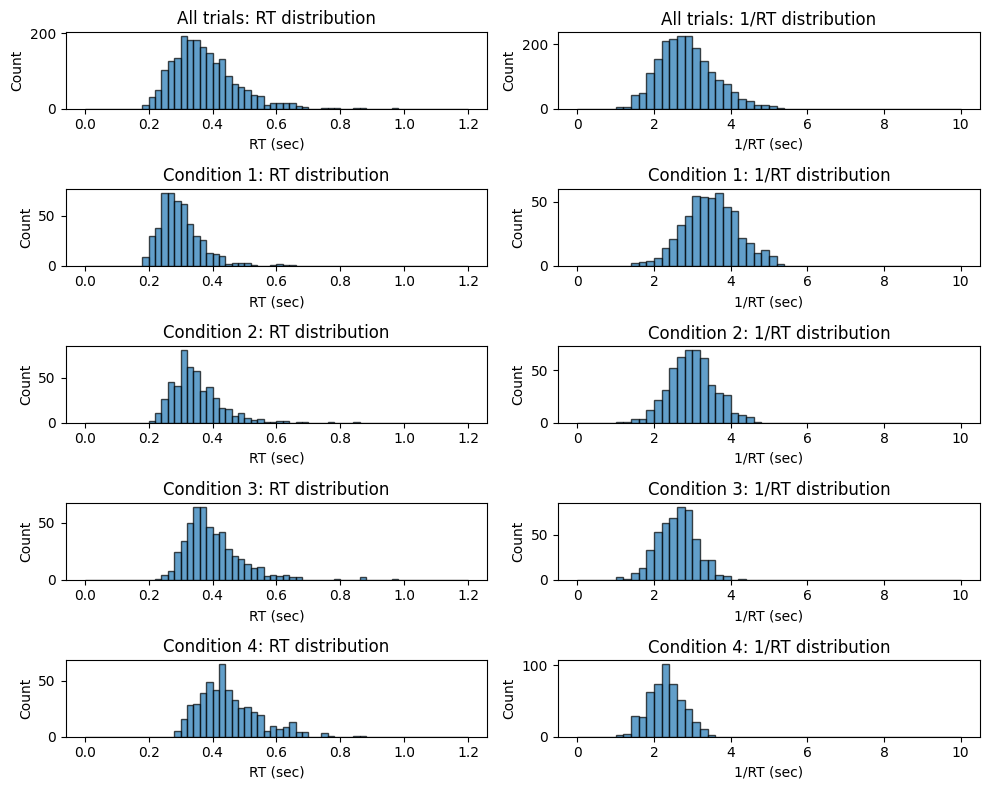

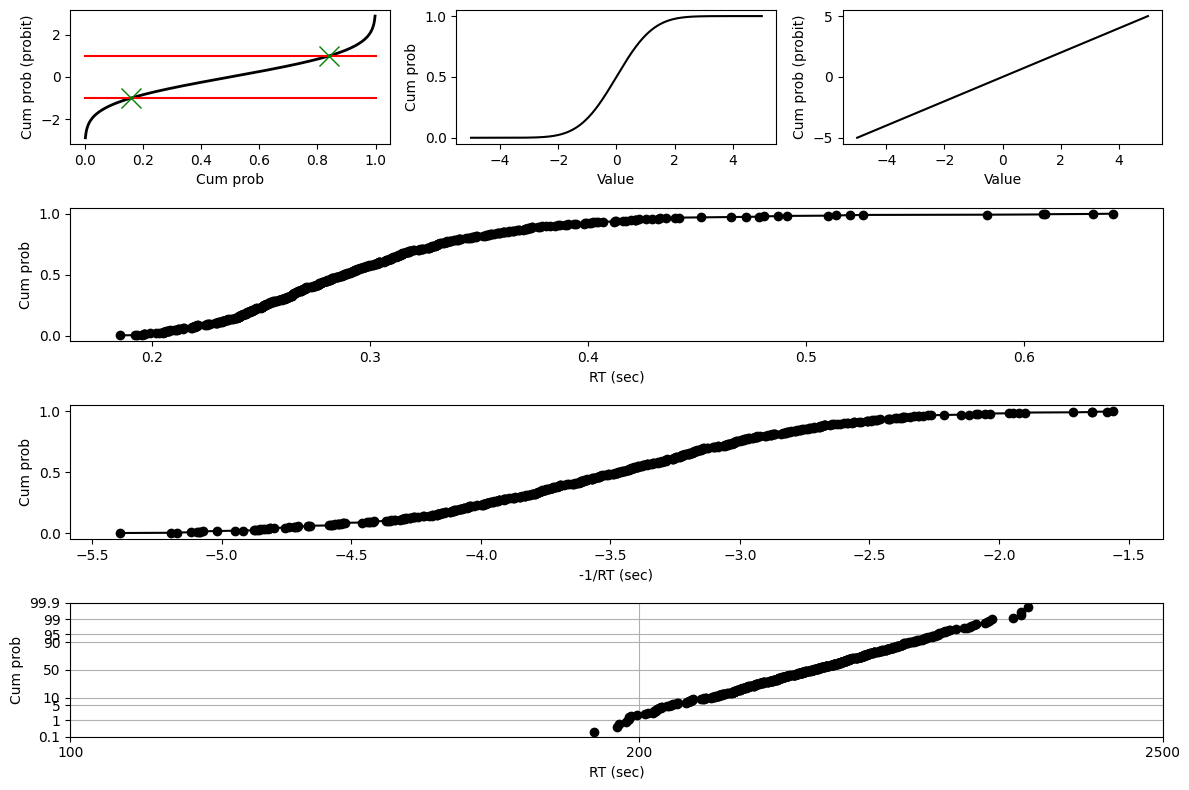

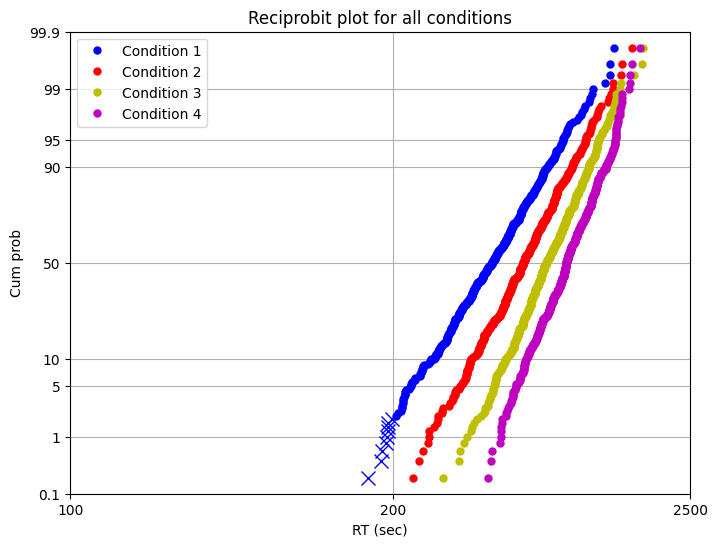

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Simulate or load RT data (simulating here for example)
def later_getData():
    # Example: simulate 4 datasets of reaction times (RTs) in seconds
    np.random.seed(0)
    data = []
    labels = ['Condition 1', 'Condition 2', 'Condition 3', 'Condition 4']
    for mean_rt in [0.3, 0.35, 0.4, 0.45]:
        # Generate RTs from an inverse Gaussian-like distribution
        # We simulate normal rate variable, then RT = distance / rate
        distance = 1.0
        rates = np.random.normal(loc=3.5, scale=0.7, size=500)
        rates = rates[rates > 0]  # rates must be positive
        rts = distance / rates
        # Shift RTs to have mean near mean_rt by scaling
        rts = rts * (mean_rt / np.mean(rts))
        data.append(rts)
    return data, labels

# Histogram plotting function (similar to later_plotHistogram)
def later_plotHistogram(data, bins, title):
    plt.hist(data, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel('RT (sec)')
    plt.ylabel('Count')

# --- 1. Load the raw data ---
data, labels = later_getData()

# --- Plot RT and inverse RT distributions ---
rtBins  = np.arange(0, 1.22, 0.02)
rrtBins = np.arange(0, 10.2, 0.2)

plt.figure(figsize=(10, 8))

# TOP: ALL SELECTED TRIALS
plt.subplot(5, 2, 1)
plt.hist(np.hstack(data), bins=rtBins, edgecolor='black', alpha=0.7)
plt.title('All trials: RT distribution')
plt.xlabel('RT (sec)')
plt.ylabel('Count')

plt.subplot(5, 2, 2)
plt.hist(1 / np.hstack(data), bins=rrtBins, edgecolor='black', alpha=0.7)
plt.title('All trials: 1/RT distribution')
plt.xlabel('1/RT (sec)')
plt.ylabel('Count')

# Loop for each condition
for ii in range(len(labels)):
    plt.subplot(5, 2, 3 + ii*2)
    plt.hist(data[ii], bins=rtBins, edgecolor='black', alpha=0.7)
    plt.title(f'{labels[ii]}: RT distribution')
    plt.xlabel('RT (sec)')
    plt.ylabel('Count')

    plt.subplot(5, 2, 4 + ii*2)
    plt.hist(1 / data[ii], bins=rrtBins, edgecolor='black', alpha=0.7)
    plt.title(f'{labels[ii]}: 1/RT distribution')
    plt.xlabel('1/RT (sec)')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# --- Plot reciprobit example for first dataset ---

rts = data[0]
rts_sorted = np.sort(rts)
n = len(rts_sorted)
cumulative_probabilities = np.arange(1, n + 1) / n
probit_cum_probs = norm.ppf(cumulative_probabilities)

plt.figure(figsize=(12, 8))

# 1.a Show probit transform intuition
plt.subplot(4, 3, 1)
plt.plot(cumulative_probabilities, probit_cum_probs, 'k-', linewidth=2)
plt.plot([0, 1], [-1, -1], 'r-')
plt.plot([0, 1], [1, 1], 'r-')
plt.plot(0.5 + np.array([-0.34, 0.34]), [-1, 1], 'gx', markersize=15)
plt.xlabel('Cum prob')
plt.ylabel('Cum prob (probit)')

# 1.b Ideal cumulative Gaussian on probability scale
x = np.arange(-5, 5.01, 0.01)
plt.subplot(4, 3, 2)
plt.plot(x, norm.cdf(x), 'k-')
plt.xlabel('Value')
plt.ylabel('Cum prob')

# 1.c Ideal cumulative Gaussian on probit scale (straight line)
plt.subplot(4, 3, 3)
plt.plot(x, norm.ppf(norm.cdf(x)), 'k-')
plt.xlabel('Value')
plt.ylabel('Cum prob (probit)')

# 2. Empirical cumulative RT distribution
plt.subplot(4, 1, 2)
plt.plot(rts_sorted, cumulative_probabilities, 'ko-')
plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')

# 3. Empirical cumulative -1/RT distribution
plt.subplot(4, 1, 3)
plt.plot(-1 / rts_sorted, cumulative_probabilities, 'ko-')
plt.xlabel('-1/RT (sec)')
plt.ylabel('Cum prob')

# 4. Empirical cumulative -1/RT on probit scale
plt.subplot(4, 1, 4)
plt.plot(-1 / rts_sorted, probit_cum_probs, 'ko')
plt.grid(True)

# Customize ticks similar to MATLAB code
express_cutoff = 200  # ms (not directly used here)
XTickLabels = [100, 200, 2500]
XTickValues = -1000 / np.array(XTickLabels)  # convert ms to seconds inverse
YTickLabels = [0.1, 1, 5, 10, 50, 90, 95, 99, 99.9]
YTickValues = norm.ppf(np.array(YTickLabels) / 100)

plt.xticks(XTickValues, XTickLabels)
plt.yticks(YTickValues, YTickLabels)
plt.ylim(YTickValues[0], YTickValues[-1])
plt.xlim(XTickValues[0], XTickValues[-1])

plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')

plt.tight_layout()
plt.show()

# --- Plot reciprobit plot for all datasets ---
plt.figure(figsize=(8, 6))
colors = ['b', 'r', 'y', 'm']
express_cutoff = 0.2  # seconds

for ii, label in enumerate(labels):
    rts_sorted = np.sort(data[ii])
    n = len(rts_sorted)
    cum_probs = np.arange(1, n+1) / n
    probit_cum_probs = norm.ppf(cum_probs)

    # Separate express saccades
    Lexpress = rts_sorted < express_cutoff

    # Plot express saccades
    plt.plot(-1 / rts_sorted[Lexpress], probit_cum_probs[Lexpress], 'x', color=colors[ii], markersize=10)

    # Plot regular saccades
    plt.plot(-1 / rts_sorted[~Lexpress], probit_cum_probs[~Lexpress], 'o', color=colors[ii],
             markerfacecolor=colors[ii], markersize=5, label=label)

plt.grid(True)

plt.xticks(XTickValues, XTickLabels)
plt.yticks(YTickValues, YTickLabels)
plt.ylim(YTickValues[0], YTickValues[-1])
plt.xlim(XTickValues[0], XTickValues[-1])

plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')
plt.legend(loc='upper left')
plt.title('Reciprobit plot for all conditions')
plt.show()


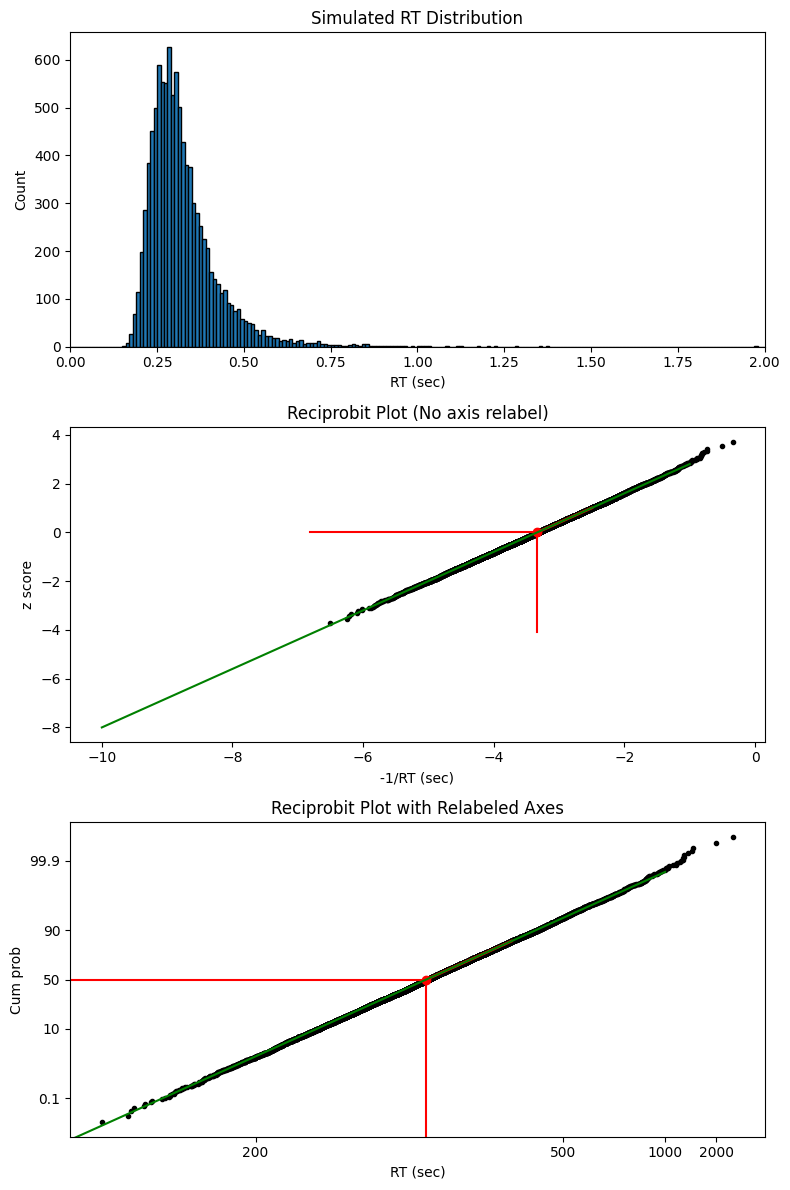

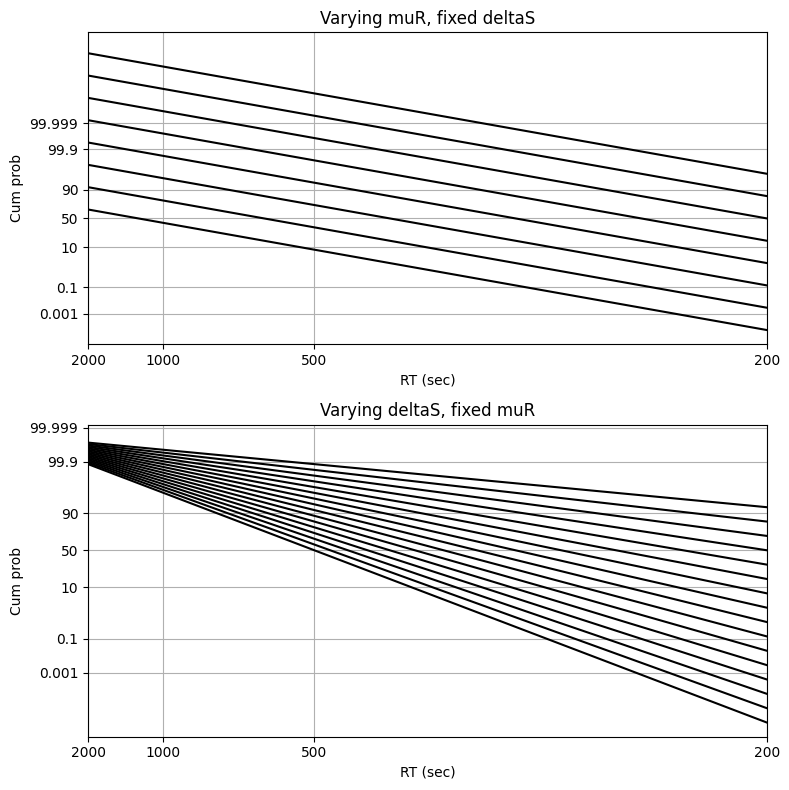

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Parameters ---
muR = 4      # mean rate of rise
stdR = 1     # std dev of rate of rise
deltaS = 1.2 # distance from start to threshold
N = 10000    # number of simulated RTs

# --- Simulate RT distribution ---
# RT = deltaS / rate, where rate ~ N(muR, stdR)
rates = np.random.normal(muR, stdR, N)
rates = rates[rates > 0]  # ensure rates > 0 to avoid negative RTs
RT = deltaS / rates

# --- Plot histogram of RT ---
plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.hist(RT, bins=np.arange(0, 2.01, 0.01), edgecolor='black')
plt.xlim([0, 2])
plt.xlabel('RT (sec)')
plt.ylabel('Count')
plt.title('Simulated RT Distribution')

# --- Compute reciprobit values ---
sorted_RT = np.sort(RT)
xValues = -1 / sorted_RT
cum_probs = np.arange(1, len(sorted_RT) + 1) / len(sorted_RT)
yValues = norm.ppf(cum_probs)

# --- Plot reciprobit without relabeling axes ---
plt.subplot(3, 1, 2)
plt.plot(xValues, yValues, 'k.')
plt.xlabel('-1/RT (sec)')
plt.ylabel('z score')
xlm = plt.xlim()
ylm = plt.ylim()
plt.title('Reciprobit Plot (No axis relabel)')

# --- Plot reciprobit with relabeled axes ---
plt.subplot(3, 1, 3)
plt.plot(xValues, yValues, 'k.')
plt.xlim(xlm)
plt.ylim(ylm)

XTickLabels = [200, 500, 1000, 2000]
XTickValues = -1000 / np.array(XTickLabels)

YTickLabels = [0.1, 10, 50, 90, 99.9]
YTickValues = norm.ppf(np.array(YTickLabels) / 100)

plt.gca().set_xticks(XTickValues)
plt.gca().set_xticklabels(XTickLabels)
plt.gca().set_yticks(YTickValues)
plt.gca().set_yticklabels(YTickLabels)

plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')
plt.title('Reciprobit Plot with Relabeled Axes')

# --- Overlay analytic solution on reciprobit plots ---
for i in [2, 3]:  # matplotlib subplots are 1-based indexing here for readability
    plt.subplot(3, 1, i)
    xIntercept = -muR / deltaS
    plt.plot([xlm[0], xIntercept], [0, 0], 'r-')
    plt.plot([xIntercept, xIntercept], [ylm[0], 0], 'r-')
    plt.plot(xIntercept, 0, 'ro')
    plt.plot([xIntercept, xIntercept + 1 / deltaS], [0, 1], 'r-', linewidth=2)

    # Plot analytic reciprobit line: y = slope * x + intercept
    xRT = np.array([0.1, 1.0])
    reci_xRT = -1 / xRT
    plt.plot(reci_xRT, reci_xRT * deltaS + muR, 'g-')

plt.tight_layout()
plt.show()

# --- Vary muR and deltaS and visualize effects ---
plt.figure(figsize=(8, 8))

xRT = np.array([0.2, 4.0])
reci_xRT = -1 / xRT
muRs = np.arange(1, 9)
deltaSs = np.arange(0.5, 2.01, 0.1)

# Vary muR, fixed deltaS
plt.subplot(2, 1, 1)
for mu in muRs:
    plt.plot(reci_xRT, reci_xRT * deltaS + mu, 'k-')
plt.title('Varying muR, fixed deltaS')
plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')

# Vary deltaS, fixed muR
plt.subplot(2, 1, 2)
for ds in deltaSs:
    plt.plot(reci_xRT, reci_xRT * ds + muR, 'k-')
plt.title('Varying deltaS, fixed muR')
plt.xlabel('RT (sec)')
plt.ylabel('Cum prob')

# Label axes for both plots
for i in [1, 2]:
    plt.subplot(2, 1, i)
    plt.grid(True)
    plt.xlim(-1000 / 2000, -1000 / 200)
    
    XTickLabels = [200, 500, 1000, 2000]
    XTickValues = -1000 / np.array(XTickLabels)

    YTickLabels = [0.001, 0.1, 10, 50, 90, 99.9, 99.999]
    YTickValues = norm.ppf(np.array(YTickLabels) / 100)

    plt.gca().set_xticks(XTickValues)
    plt.gca().set_xticklabels(XTickLabels)
    plt.gca().set_yticks(YTickValues)
    plt.gca().set_yticklabels(YTickLabels)

plt.tight_layout()
plt.show()
